# Segmenting Image using k-Means and DBSCAN on colored and grayscale Images

##### Inspiration: While looking through kaggle, I found a pneumonia data set where you had to classify whether a patient had pneumonia or not. While a lot of the submitted kernels had classification accuracies of over 80%, it is definitely feasible to teach a computer to classify whether someone has pneumonia, there must still be a way for us humans to see X-Rays better. Now what if we wanted to help doctors see better, without having to see for them. Yes, you are probably thinking "Why let a human do it if a computer can differentiate between pixel differences worlds better?"

##### There are still others out there that feel as though ML / DL will be taking their jobs away, so maybe this will be a happy medium between technology and humans.

##### As a result, I will be using two clustering algorithms to cluster both colored and grayscaled images. First will be a cute doggo (colored) and lastly will be one normal patient X-Ray and a sick patient X-Ray. These results will not have an accuracy value attached to it, rather a qualitative / subjective result. We ultimately want to segment images as cleanly as possible. 

* I will be writing algorithms for k-means and DBSCAN from scratch, and will be comparing the results to packages from sklearn(kMeans) and sklearn(DBSCAN).

In [1]:
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from copy import deepcopy

In [2]:
# Euclidean Distance
def dist(a, b, ax = 1):
    return np.linalg.norm(a - b, axis = ax)

# Choosing random points from data
def randChoice(data, k):
    idx = np.random.randint(len(data), size = k)
    return data[idx, :]

In [3]:
#k-Means algorithm with a choice of error rate when to stop convergence
def kMeans(data, k, error_rate = 0):
    # Initial k points are random points in the data
    np.random.seed(100)
    cltr = randChoice(data, k)
    #Old Cluster that will be overwritten
    cltr_old = np.zeros(cltr.shape)
    #Labels of each row in data set - Returned val
    cltr_lbl = np.zeros(len(data))
    #Error rate that will be updated until reaches convergence rate
    err = dist(cltr, cltr_old, None)

    while err > error_rate:
        
        for i in range(len(data)):
            #Checks distance between every point and initial center
            dist_ = dist(data[i], cltr)
            #Takes lowest value distance and stores index
            cltr_ = np.argmin(dist_)
            #Stores index in cluster label array
            cltr_lbl[i] = cltr_
        cltr_old = deepcopy(cltr)
        
        for i in range(k):
            pts = [data[j] for j in range(len(data)) if cltr_lbl[j] == i]
            #Gets mean of each cluster to shift cluster center
            cltr[i] = np.mean(pts, axis = 0)
        err = dist(cltr, cltr_old, None)
    
    return cltr_lbl

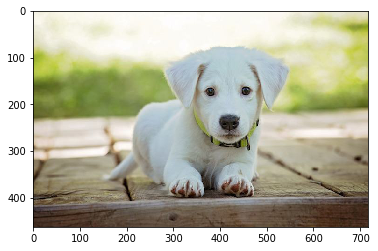

In [4]:
# Using PIL and matplotlib to show the heckin' cute doggo
im = Image.open('doggo.jpg')
doggo = np.asarray(im)
imshow(np.asarray(doggo))

In [5]:
print(doggo.shape)

(463, 717, 3)


In [6]:
#Flatten the array so it's easier to work with and divide by max RGB value
#to make working with the data easier
reshape_dog = (doggo.reshape(463*717,3) / 255)
reshape_dog.shape

In [8]:
#Calling method to cluster cute doggo
dog_cluster = kMeans(reshape_dog, 3, 0)

In [9]:
#Reshaping the cluster labels to prep for concatenation 
dog_cluster = dog_cluster.reshape(len(dog_cluster),1)
#Concatenating doggo with labels
re_dog_clst = np.concatenate((reshape_dog * 255, dog_cluster), axis = 1)

In [157]:
#Turning numPy array to DF so it's easier to work with
dog_df = pd.DataFrame(re_dog_clst)

In [158]:
#First Cluster gets Red Values
dog_df.loc[dog_df[3] == 0, [0]] = 255
dog_df.loc[dog_df[3] == 0, [1]] = 0
dog_df.loc[dog_df[3] == 0, [2]] = 0
#Second Cluster gets Blue Values
dog_df.loc[dog_df[3] == 1, [0]] = 0
dog_df.loc[dog_df[3] == 1, [1]] = 255
dog_df.loc[dog_df[3] == 1, [2]] = 0
#Third Cluster gets Green Values
dog_df.loc[dog_df[3] == 2, [0]] = 0
dog_df.loc[dog_df[3] == 2, [1]] = 0
dog_df.loc[dog_df[3] == 2, [2]] = 255

In [159]:
#Dropping cluster label column and reverting back to numPy array
dog_df = dog_df.drop(columns = [3])
dog_df = dog_df.values

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


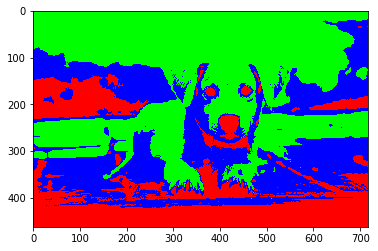

In [160]:
#Reshaping the doggo back to cute boy
dog_im = dog_df.reshape(463, 717, 3)
imshow(np.asarray(dog_im))